In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'w'

In [3]:
# load scraped data
df_raw = pd.read_csv('../data/IMDB_Top250_features_raw.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UID                         239 non-null    int64  
 1   aspect ratio                239 non-null    object 
 2   rating                      239 non-null    float64
 3   title                       239 non-null    object 
 4   votes                       239 non-null    int64  
 5   year                        239 non-null    int64  
 6   Budget                      229 non-null    object 
 7   Cumulative Worldwide Gross  178 non-null    object 
 8   countries                   239 non-null    object 
 9   directors                   239 non-null    object 
 10  genres                      239 non-null    object 
 11  genres.1                    214 non-null    object 
 12  genres.2                    144 non-null    object 
 13  runtimes                    239 non

# Check Duplicates

In [4]:
df_raw[df_raw.duplicated(subset=['UID'])]

,UID,aspect ratio,rating,title,votes,year,Budget,Cumulative Worldwide Gross,countries,directors,genres,genres.1,genres.2,runtimes,writers,writers.1,writers.2


# Visualize Missing Data

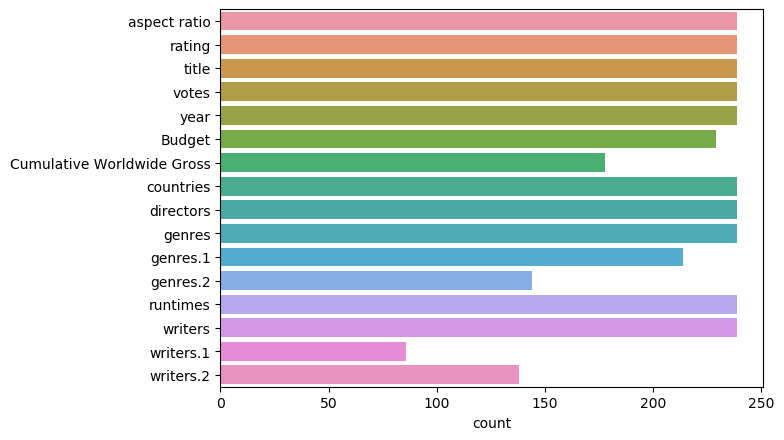

In [5]:
# visualize missing data
df_var_counts = pd.DataFrame(df_raw.groupby('UID').count().sum().reset_index())
df_var_counts.columns = ['var', 'count']
sns.barplot(x='count', y='var', data=df_var_counts)
plt.ylabel('')
plt.show()

# How many genres?

In [6]:
genres_all = pd.concat((df_raw.genres, df_raw['genres.1'], df_raw['genres.2'])).reset_index(drop=True)
genres_set = set(genres_all)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western',
 nan}

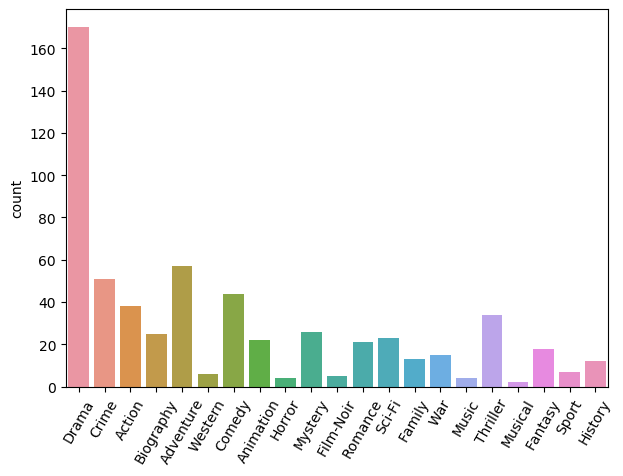

In [7]:
sns.countplot(genres_all)
plt.xticks(fontsize=10, rotation=60)
plt.show()

# Runtimes

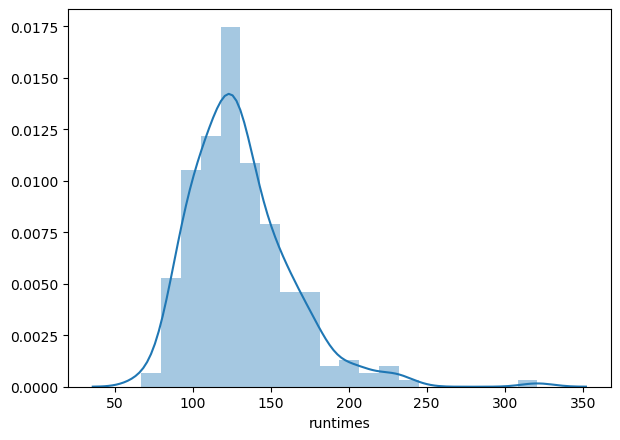

In [8]:
sns.distplot(df_raw.runtimes)
plt.show()

## Correlation between runtime and rating?

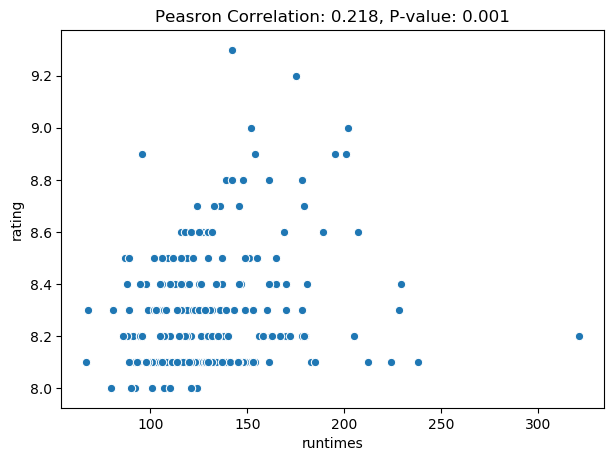

In [9]:
sns.scatterplot(x='runtimes', y='rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw.runtimes, df_raw.rating))
plt.show()

## Correlation between votes and rating?

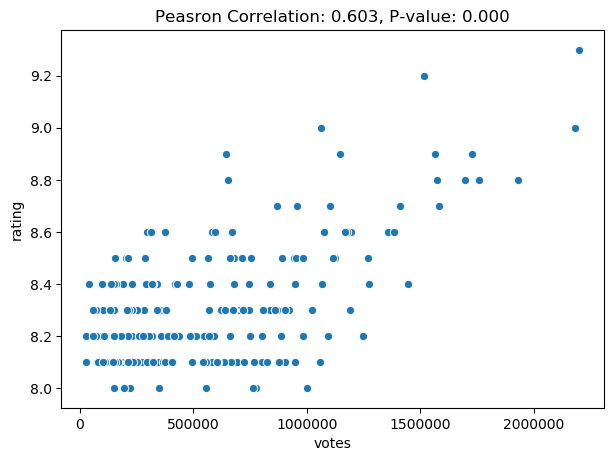

In [10]:
sns.scatterplot(x='votes', y='rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw.votes, df_raw.rating))
plt.show()

# How many countries?

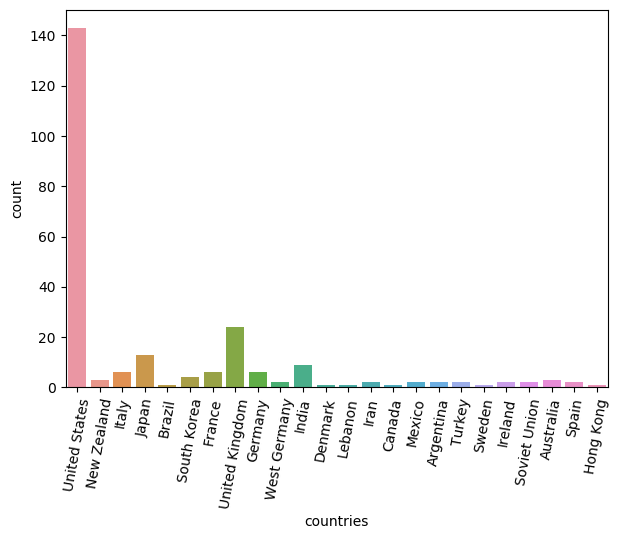

In [11]:
sns.countplot(df_raw.countries)
plt.xticks(fontsize=10, rotation=80)
plt.show()

# Budget

* JPY:USD - 0.0093
* EUR:USD - 1.09
* GBP:USD - 1.16
* FRF:UDS - 7.16

In [12]:
# define currency foreign exchange rate
df_raw.loc[:, 'forex'] = 1.0
df_raw.loc[df_raw.Budget.str.contains('JPY', na=False), 'forex'] = 0.0093
df_raw.loc[df_raw.Budget.str.contains('EUR', na=False), 'forex'] = 1.09
df_raw.loc[df_raw.Budget.str.contains('GBP', na=False), 'forex'] = 1.16
df_raw.loc[df_raw.Budget.str.contains('FRF', na=False), 'forex'] = 7.16

In [13]:
# convert budgets to USD
df_raw.loc[:, 'Budget_USD'] = df_raw.Budget.str.replace(',|\s.*|[^\d\W]|\$', '').astype(float) * df_raw.forex
df_raw.loc[:, 'Budget_USD_log'] = np.log(df_raw.Budget_USD)

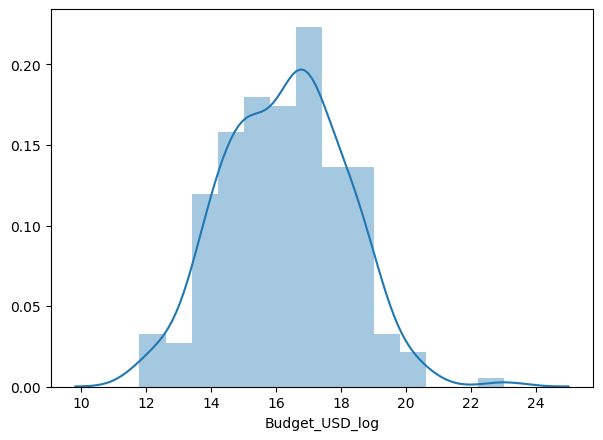

In [14]:
sns.distplot(df_raw.Budget_USD_log)
plt.show()

## Correlation between budget and rating?

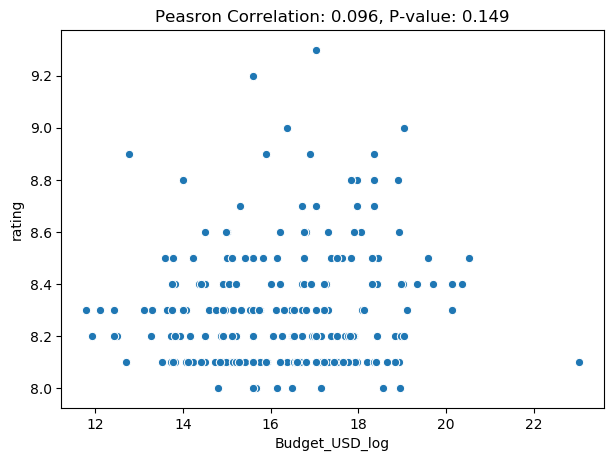

In [15]:
sns.scatterplot(x='Budget_USD_log', y='rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw[~df_raw.Budget_USD_log.isnull()].Budget_USD_log,
                         df_raw[~df_raw.Budget_USD_log.isnull()].rating))
plt.show()

# Cumulative Worldwide Gross

In [16]:
df_raw.loc[:, 'Gross_USD'] = df_raw['Cumulative Worldwide Gross'].str.replace(',|\s.*|[^\d\W]|\$', '').astype(float)
df_raw.loc[:, 'Gross_USD_log'] = np.log(df_raw.Gross_USD)

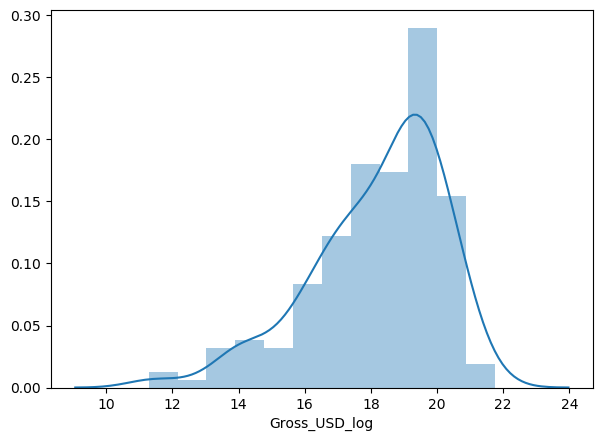

In [17]:
sns.distplot(df_raw.Gross_USD_log)
plt.show()

## Correlation between box office and rating?

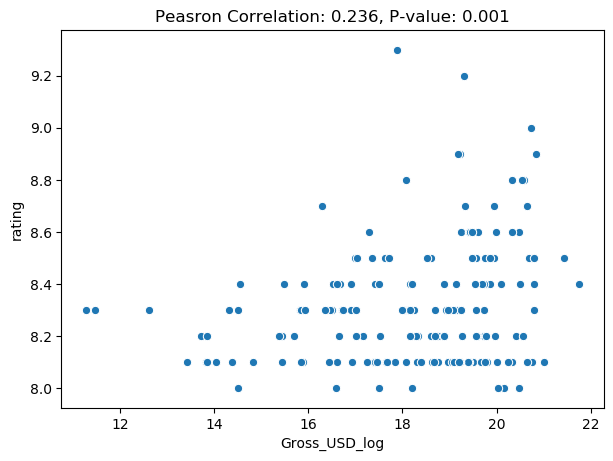

In [18]:
sns.scatterplot(x='Gross_USD_log', y='rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw[~df_raw.Gross_USD_log.isnull()].Gross_USD_log,
                         df_raw[~df_raw.Gross_USD_log.isnull()].rating))
plt.show()

# How many directors?

In [19]:
directors_set = set(df_raw.directors)
len(directors_set)

147

In [20]:
top_directors = list(df_raw.directors.value_counts().index[df_raw.directors.value_counts()>2])
top_directors

['Martin Scorsese',
 'Christopher Nolan',
 'Stanley Kubrick',
 'Alfred Hitchcock',
 'Billy Wilder',
 'Steven Spielberg',
 'Charles Chaplin',
 'Quentin Tarantino',
 'Hayao Miyazaki',
 'Akira Kurosawa',
 'Sergio Leone',
 'James Cameron',
 'Pete Docter',
 'Frank Capra',
 'Ridley Scott',
 'Clint Eastwood',
 'Peter Jackson',
 'David Fincher',
 'Francis Ford Coppola']

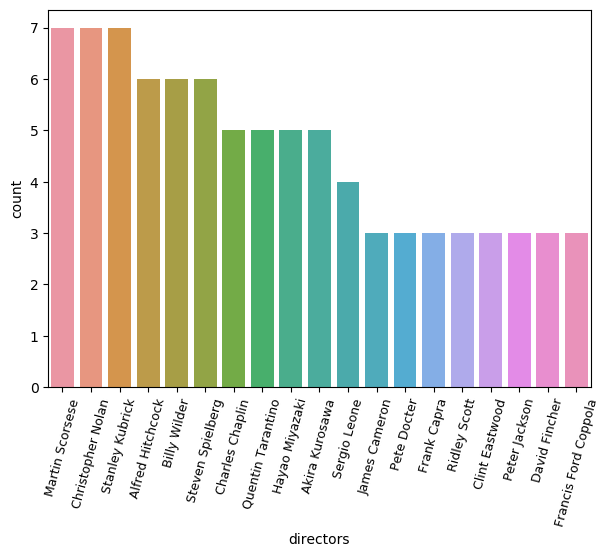

In [21]:
sns.countplot(df_raw.directors, order=top_directors)
plt.xticks(fontsize=9, rotation=75)
plt.show()

# How many writers?

In [22]:
writers_all = pd.concat((df_raw.writers, df_raw['writers.1'], df_raw['writers.2'])).reset_index(drop=True)
writers_set = set(writers_all)
len(writers_set)

346

In [23]:
top_writers = list(writers_all.value_counts().index[writers_all.value_counts()>2])
top_writers

['Quentin Tarantino',
 'Stanley Kubrick',
 'Akira Kurosawa',
 'Hayao Miyazaki',
 'Christopher Nolan',
 'Billy Wilder',
 'Andrew Stanton',
 'Jonathan Nolan',
 'Charles Chaplin',
 'Pete Docter',
 'Stephen King',
 'George Lucas',
 'Nicholas Pileggi',
 'Lawrence Kasdan',
 'Hideo Oguni',
 'Sergio Leone',
 'J.R.R. Tolkien',
 'Bong Joon Ho',
 'Ethan Coen',
 'Fran Walsh',
 'William Goldman',
 'Francis Ford Coppola',
 'Joel Coen',
 'James Cameron']

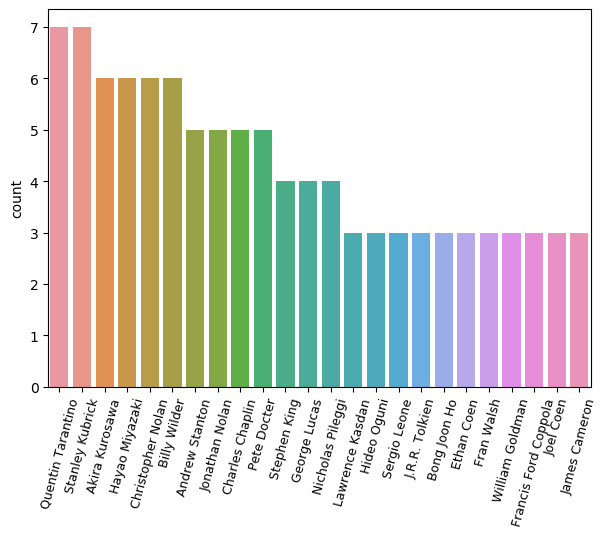

In [24]:
sns.countplot(writers_all, order=top_writers)
plt.xticks(fontsize=9, rotation=75)
plt.show()

# Aspect Ratio

In [25]:
df_raw['aspect_num'] = df_raw['aspect ratio'].str.replace(' :.*', '').astype(float)

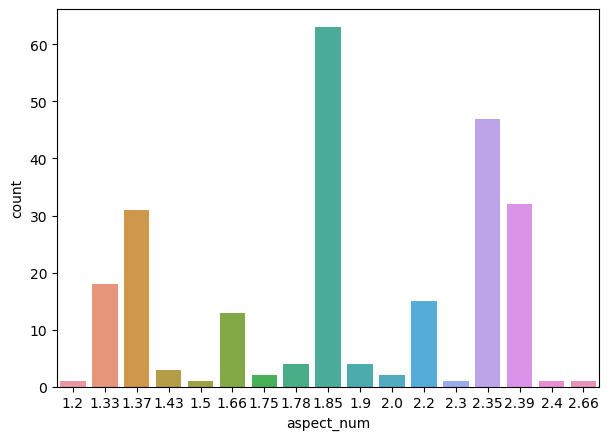

In [26]:
sns.countplot(df_raw.aspect_num)
plt.show()

## Correlation between aspect ratio and rating?

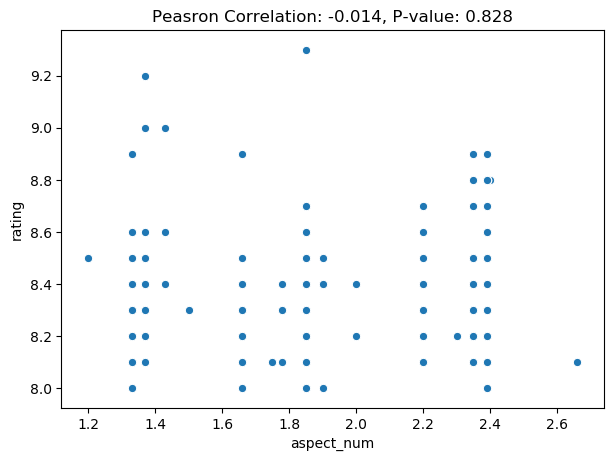

In [27]:
sns.scatterplot(x='aspect_num', y='rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw[~df_raw.aspect_num.isnull()].aspect_num,
                         df_raw[~df_raw.aspect_num.isnull()].rating))
plt.show()